### Example 1:
An airport runway which serves the sole purpose of aircraft arrivals. The Arriving aircrafts join a single queue for the runway. It is given that Exponentially distributed service time, i.e. the arriving aircraft receive services such as unloading of passengers, unloading of luggage, cleaning, refuelling, etc. with a rate µ = 25 arrivals / hour and Poisson arrivals with a rate λ = 20 arrivals / hour.

Enter time for simulation (Hours): 24
Enter Job Arrival Rate (/Hour): 20
Enter Job Service Rate (/Hour): 27


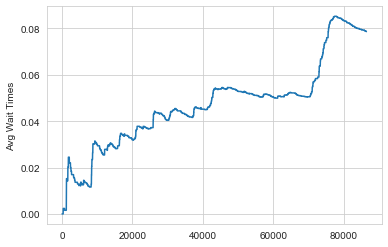

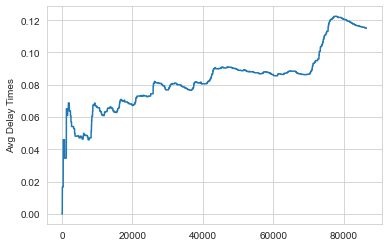

In [11]:
import numpy as np
import queue
import copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Input Parameters
total_time = int(input("Enter time for simulation (Hours): "))
IAT_rate = int(input("Enter Job Arrival Rate (/Hour): "))
ST_rate = int(input("Enter Job Service Rate (/Hour): "))
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []      # Inter-arrival times in units
ST = []       # Service time in units
AT = []       # Arrival times in units
wait_time = []
server_busy = False
list_wait = []
list_delay = []

num_processes = int(np.random.poisson(IAT_rate) * total_time)   
num_processes_served = 0

# Populate Inter-Arrival-Times (IAT)
for i in range(num_processes):
    temp = np.random.exponential(1/IAT_rate)*60*60 # Inter-arrival times in seconds
    if i==0:
        IAT.append(0)
    else:
        IAT.append(int(temp - temp%1))
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp - temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

num_queue = [] 
# Simulation of M/M/1 Queue (i represents current time)
for i in range(total_time*60*60):    
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1
   
    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)
            num_queue.append(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True


    sum_wait = 0
    sum_delay = 0

    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

plt.plot([i+1 for i in range(total_time*60*60)], list_wait)
plt.ylabel("Avg Wait Times")
plt.show()

plt.plot([i+1 for i in range(total_time*60*60)], list_delay)
plt.ylabel("Avg Delay Times")
plt.show()

In [12]:
print(num_processes)
print(num_processes_served)

504
449


Most of the flights arriving withing those 24 hours are given the service at the airport within that duration only.

In [13]:
import pandas as pd
df = pd.DataFrame()
df['Cust_Num'] = pd.Series(num_queue)
df['Cust_Num'] = df['Cust_Num'] + 1
df['IAT'] = pd.Series(IAT)
df['AT'] = pd.Series(AT)
df['ST'] = pd.Series(ST_copy)
df['Wait_time'] = pd.Series(wait_time)
df.shape

(449, 5)

In [14]:
df.head()

,Cust_Num,IAT,AT,ST,Wait_time
0,1,0,0,60,0
1,2,43,43,254,17
2,3,609,652,42,0
3,4,29,681,513,13
4,5,282,963,29,244


In [15]:
tot_cust = df.shape[0]
tot_cust

449

In [16]:
# Average Waiting Time
tot_wait_time = sum(list(df['Wait_time'].values))
avg_wait_time = tot_wait_time / tot_cust
avg_wait_time / 60

4.717631774313289

The average waiting time from the simulations is just 4.7 minutes, which is not very significant.

In [17]:
# Probability that a customer has to wait
prob_wait = sum(df['Wait_time'] > 0) / tot_cust
prob_wait

0.6726057906458798

The probability that a particular flight landing on this runway would have to wait in the queue = 0.67

In [20]:
# Number of aircrafts in the Queue (Lq)
lq = rho**2 / (1 - rho)
print(f"Number of aircrafts in the Queue (Lq) = {np.round(lq,2)}")
# Wait time in the Queue (Wq)
wq = lq / IAT_rate
print(f"Wait time in the Queue (Wq) = {np.round(wq*60,2)} minutes")
# Wait time in the System (W)
w = wq + (1 / ST_rate)
print(f"Wait time in the System (W) = {np.round(w*60,2)} minutes")
# Number in the System = L = λW = 4.
l = IAT_rate * w
print(f"Number of aircrafts in the System (L) = {np.round(l,2)}")
# Proportion of time the server is idle (p)
p = 1 - rho
print(f"Proportion of time the server is idle (p) = {np.round(p,2)}")

Number of aircrafts in the Queue (Lq) = 2.12
Wait time in the Queue (Wq) = 6.35 minutes
Wait time in the System (W) = 8.57 minutes
Number of aircrafts in the System (L) = 2.86
Proportion of time the server is idle (p) = 0.26


The proportion of time the server is idle is also low, which shows that the server (runway services) are well loaded for the functioning of a particular day.